<a href="https://colab.research.google.com/github/nurhhafizah/assignment-ai/blob/main/ai_assg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile
import os

# This identifies the zip file you uploaded and unzips it
with zipfile.ZipFile('archive.zip', 'r') as zip_ref:
    zip_ref.extractall()

# Verify the CSV file is now there
print("Files in folder:", os.listdir())

Files in folder: ['.config', 'creditcard.csv', 'archive.zip', '.ipynb_checkpoints', 'sample_data']


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# 1. Load the dataset
# Significant line: Reads the unzipped CSV file into a dataframe
df = pd.read_csv('creditcard.csv')

# 2. Balance the dataset
# Significant line: Fraud is rare, so we balance classes to improve NN learning
fraud = df[df['Class'] == 1]
normal = df[df['Class'] == 0].sample(n=len(fraud), random_state=42)
df_balanced = pd.concat([fraud, normal])

# 3. Prepare data for the model
X = df_balanced.drop('Class', axis=1)
y = df_balanced['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Feature Scaling
# Significant line: Standardizes data so the NN brain can process it accurately
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 5. Define and Train the NN Model
# Significant line: Implements the NN (Multi-layer Perceptron) required by Table 2
model = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# 6. Generate results for the technical report
y_pred = model.predict(X_test)

# Significant line: Outputs the specific performance metrics required by the assignment
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score:  {f1_score(y_test, y_pred):.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Precision: 1.0000
Recall:    0.9293
F1-Score:  0.9634

Confusion Matrix:
[[98  0]
 [ 7 92]]


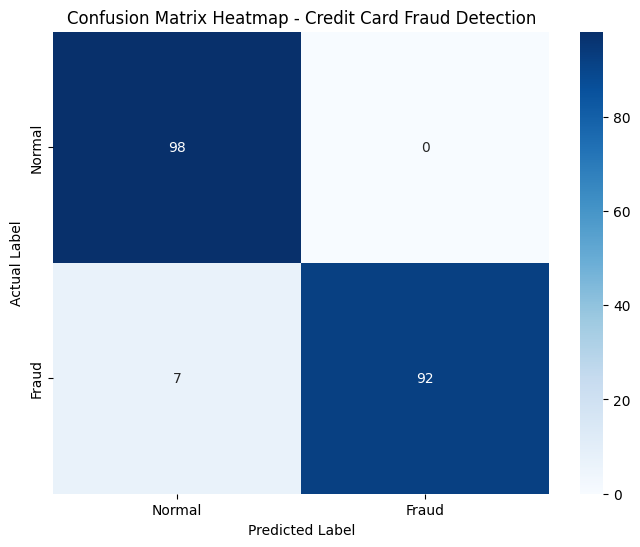

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Use the y_test and y_pred variables from your previous code
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Normal', 'Fraud'],
            yticklabels=['Normal', 'Fraud'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix Heatmap - Credit Card Fraud Detection')
plt.show()

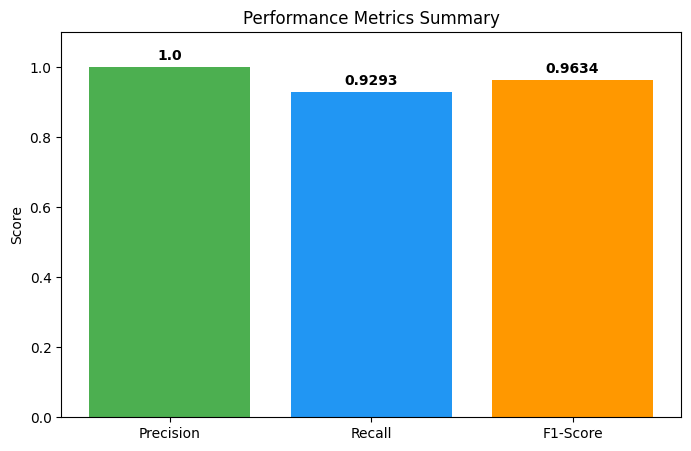

In [5]:
# Create a list of your metrics
metrics = ['Precision', 'Recall', 'F1-Score']
values = [1.0000, 0.9293, 0.9634] # Use your exact output values

plt.figure(figsize=(8, 5))
plt.bar(metrics, values, color=['#4CAF50', '#2196F3', '#FF9800'])
plt.ylim(0, 1.1) # Set limit slightly higher than 1.0 for clarity
plt.ylabel('Score')
plt.title('Performance Metrics Summary')

# Add the numbers on top of the bars
for i, v in enumerate(values):
    plt.text(i, v + 0.02, str(v), ha='center', fontweight='bold')

plt.show()